In [1]:
#following 'construct train and test data.ipynb'
import pandas as pd
final_dataset = pd.read_csv('/Users/hongrunqiao/desktop/final_dataset.csv')

In [2]:
final_dataset.loc[final_dataset['max_score']>=4,'target']=1
final_dataset.loc[final_dataset['max_score']<4,'target']=0

In [3]:
Target = final_dataset['target']

In [4]:
raw_dataset = final_dataset.drop(['max_score','latest_comment_time','Year','Month'],axis = 1)

In [5]:
raw_dataset.head()

,product_description_lenght,product_photos_qty,type__automotivo,type__beleza_saude,type__brinquedos,type__cama_mesa_banho,type__esporte_lazer,type__informatica_acessorios,type__moveis_decoracao,type__other,...,status__invoiced,status__processing,status__shipped,status__unavailable,ship_score,installments_use,order_voucher_use,freight_ratio,month_avgscore,target
0,535.0,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.063559,1.0,1.0,0.05,4.107332,1.0
1,231.0,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.195570,1.0,0.0,0.27,4.107332,0.0
2,120.0,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.389557,1.0,0.0,0.32,4.107332,0.0
3,625.0,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0.201766,1.0,0.0,0.05,4.107332,1.0
4,1507.0,2.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.170216,1.0,1.0,0.24,4.107332,1.0


In [6]:
raw_dataset =raw_dataset.drop(['target'],axis=1)

In [7]:
train_data = raw_dataset[0:81006]
test_data = raw_dataset[81006:len(raw_dataset)]

In [8]:
train_target = Target[0:81006]
test_target = Target[81006:len(raw_dataset)]

In [9]:
test_data

,product_description_lenght,product_photos_qty,type__automotivo,type__beleza_saude,type__brinquedos,type__cama_mesa_banho,type__esporte_lazer,type__informatica_acessorios,type__moveis_decoracao,type__other,...,status__delivered,status__invoiced,status__processing,status__shipped,status__unavailable,ship_score,installments_use,order_voucher_use,freight_ratio,month_avgscore
81006,816.0,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.764469,0.0,0.0,0.22,4.121983
81007,956.0,1.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.527075,0.0,0.0,0.08,4.121983
81008,518.0,1.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.446825,1.0,0.0,0.19,4.121983
81009,518.0,1.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.446825,1.0,0.0,0.19,4.121983
81010,2515.0,1.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0.409323,1.0,0.0,0.12,4.121983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101253,382.0,2.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.640796,1.0,0.0,0.17,3.976077
101254,475.0,1.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0.714838,0.0,0.0,0.22,3.976077
101255,1536.0,2.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0.268227,1.0,0.0,0.13,3.976077
101256,972.0,1.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0.359004,0.0,0.0,0.24,3.976077


In [10]:
test_target

81006     0.0
81007     1.0
81008     0.0
81009     0.0
81010     0.0
         ... 
101253    1.0
101254    1.0
101255    1.0
101256    1.0
101257    1.0
Name: target, Length: 20252, dtype: float64

In [11]:
train_target

0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
81001    0.0
81002    0.0
81003    0.0
81004    0.0
81005    0.0
Name: target, Length: 81006, dtype: float64

In [12]:
from sklearn.tree import DecisionTreeClassifier as DTC

import pandas as pd
import numpy as np

In [13]:
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

In [14]:
# fit a decision tree to the training data
tree_model = DTC()
tree_model_fit = tree_model.fit(train_data, train_target)

# get the accuracy score of the test data
tree_model_fit.score(test_data,test_target)

0.6815129369938772

In [15]:
predicted = tree_model_fit.predict(test_data)
recall=metrics.recall_score(test_target, predicted)
precision=metrics.precision_score(test_target, predicted)
f1=metrics.f1_score(test_target, predicted)
print(recall)
print(precision)
print(f1)

0.7784322609877662
0.7989105161761775
0.788538456494656


In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(train_target, test_target, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'
            
    # Compute confusion matrix
    cm = confusion_matrix(train_target, test_target)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(train_target, test_target)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

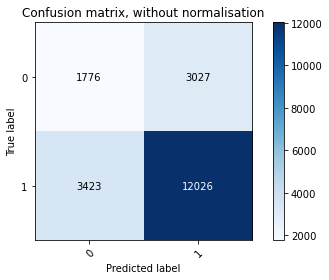

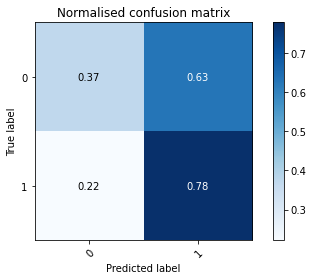

In [17]:
# predict the test data
predicted = tree_model_fit.predict(test_data)

# Plot non-normalised confusion matrix
plot_confusion_matrix(test_target, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(test_target, predicted, classes=["0", "1"], normalise=True)

In [18]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(train_data, train_target)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_split': 3}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_split': 3}




<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

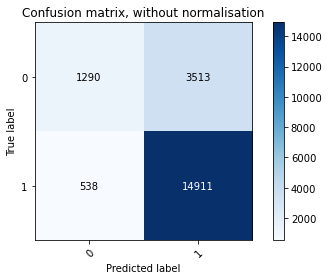

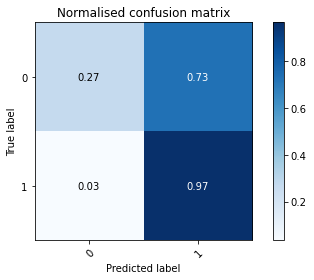

In [19]:
# fit model with new hyperparameters
tree_model = DTC(criterion='gini', max_depth=3, max_features=None, min_samples_split=3)
tree_model_fit = tree_model.fit(train_data, train_target)


# predict the test data
predicted = tree_model_fit.predict(test_data)

# Plot non-normalised confusion matrix
plot_confusion_matrix(test_target, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(test_target, predicted, classes=["0", "1"], normalise=True)

In [20]:
tree_model_fit.score(train_data, train_target)

0.7962620052835593

In [21]:
predicted2=tree_model_fit.predict(test_data)
hyperarecall=metrics.recall_score(test_target, predicted2)
hyperaprecision=metrics.precision_score(test_target, predicted2)
hyperf1=metrics.f1_score(test_target, predicted2)
print(hyperarecall)
print(hyperaprecision)
print(hyperf1)

0.9651757395300666
0.8093247937472862
0.880406223245653


In [22]:
#hyper precision=0.809; f1=0.880;acc=0.796

#old precision=0.801; f1=0.789;acc=0.682